In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from preprocessing import Word_Embedder
from preprocessing import Text_processing
from text_classification import Text_classification, Text_classification_for_prediction
from text_classification import prepare_data_for_text_classification

In [3]:
df = pd.read_csv('mari-train-balanced.csv')
df2 = pd.read_csv('mari-test-balanced.csv')
df.head()

,texts,texts_deepcut,action,object,destination
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,สอบถาม package internet ว่า มี แบบ ไหน บ้าง ครับ,enquire,promotion,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,พอดี พี่ ซื้อ เบอร์ซิม Inter ไป แล้ว แต่ ยัง ไ...,enquire,detail,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,ค่ะ พี่ ค่ะ คือ อยู่ ๆ เน็ต เล่น ไม่ ได้ อ่ะ ค่ะ,enquire,internet,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,การ เปลี่ยน ระบบ จาก ทรู เป็น ทรูเอช มี ค่า บร...,enquire,rate,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,เช็ค ให้ หน่อย ได้ ไหม ครับ ว่า เบอร์ ของ ผม เ...,enquire,package,promotions


In [4]:
df = df.rename(columns={'destination': 'labels'})[['texts', 'labels']]
df2 = df2.rename(columns={'destination': 'labels'})[['texts', 'labels']]

In [5]:
df.head()

,texts,labels
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,promotions


In [6]:
tmp_data = prepare_data_for_text_classification(df,df2,64,1)

billing and payment      3916
promotions               2280
other queries            1823
internet                 1588
international dialing     336
true money                188
lost and stolen           172
Name: labels, dtype: int64


C:\Users\Admin\Anaconda3\envs\text_bay\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[1 0 3 ... 0 0 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


CW2: {0: 0.3758572887786371, 1: 0.6455513784461153, 2: 0.8073818666248727, 3: 0.9268621806405182, 4: 4.380527210884353, 5: 7.829027355623101, 6: 8.557308970099667}


In [7]:
tc =Text_classification(tmp_data, True, True, False)

Created the path: trained_models\text_classification
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
word_vectors (InputLayer)       [(None, 64, 300)]    0                                            
__________________________________________________________________________________________________
masks (InputLayer)              [(None, 64)]         0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 64, 256)      330240      word_vectors[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 64, 256)      296448      bidirectional[0][0]              
_________________________________________

Linear classifier part
running 5-fold cv
Best C: 5, Best f1-scores: [0.88116243 0.90909091 0.77590361 0.88172043 0.80133185 0.85617597
 0.95238095]
Unweighted f1-score: 0.8653951658723057, Weighted f1-score: 0.8477599212454612


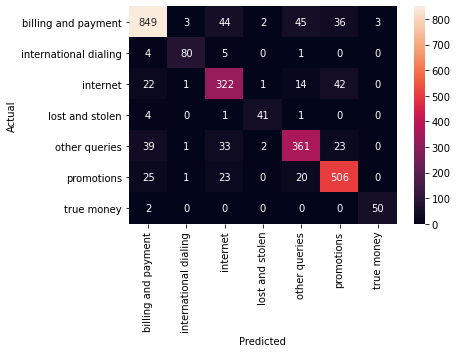

In [8]:
tc.fit_linear_classifier()

In [ ]:
tc.fit_deep_learning()

Epoch 1/500
161/161 [==============================] - 20s 123ms/step - loss: 2.3218 - precision: 0.6018 - recall: 0.1678 - val_loss: 2.1210 - val_precision: 0.8277 - val_recall: 0.2616 - lr: 0.0020
Epoch 2/500
161/161 [==============================] - 16s 97ms/step - loss: 1.5987 - precision: 0.7250 - recall: 0.4283 - val_loss: 1.5567 - val_precision: 0.8192 - val_recall: 0.5355 - lr: 0.0020
Epoch 3/500
161/161 [==============================] - 16s 98ms/step - loss: 1.3733 - precision: 0.7320 - recall: 0.4844 - val_loss: 1.5071 - val_precision: 0.7810 - val_recall: 0.5581 - lr: 0.0020
Epoch 4/500
161/161 [==============================] - 16s 99ms/step - loss: 1.2961 - precision: 0.7353 - recall: 0.5025 - val_loss: 1.6417 - val_precision: 0.7341 - val_recall: 0.4703 - lr: 0.0020
Epoch 5/500
161/161 [==============================] - 17s 105ms/step - loss: 1.1876 - precision: 0.7474 - recall: 0.5259 - val_loss: 1.1644 - val_precision: 0.8043 - val_recall: 0.6387 - lr: 0.0020
Epoch 6/

161/161 [==============================] - 18s 114ms/step - loss: 0.4963 - precision: 0.8462 - recall: 0.7772 - val_loss: 0.7049 - val_precision: 0.8504 - val_recall: 0.7913 - lr: 2.0000e-0446 -
Epoch 42/500
161/161 [==============================] - 17s 108ms/step - loss: 0.4824 - precision: 0.8506 - recall: 0.7869 - val_loss: 0.6982 - val_precision: 0.8506 - val_recall: 0.7925 - lr: 2.0000e-04
Epoch 43/500
161/161 [==============================] - 16s 102ms/step - loss: 0.4847 - precision: 0.8502 - recall: 0.7843 - val_loss: 0.7086 - val_precision: 0.8452 - val_recall: 0.7917 - lr: 2.0000e-04
Epoch 44/500
161/161 [==============================] - 17s 103ms/step - loss: 0.4830 - precision: 0.8456 - recall: 0.7828 - val_loss: 0.6860 - val_precision: 0.8579 - val_recall: 0.7940 - lr: 2.0000e-04
Epoch 45/500
161/161 [==============================] - 17s 105ms/step - loss: 0.4738 - precision: 0.8498 - recall: 0.7848 - val_loss: 0.6926 - val_precision: 0.8557 - val_recall: 0.7867 - lr: 

# Prediction test

In [3]:
TC = Text_classification_for_prediction( 'E:\\Coding_projects\\Thai_NLP\\models for real deployment\\tf-idf_encoder.joblib','E:\\Coding_projects\\Thai_NLP\\trained_models\\text_classification')

loading deeplearning model
loading logistic regression model
loading the embedder and tokenizer


In [4]:
TC.predict('ทำไมอินเตอร์เนตผมช้ามากๆเลยครับ')

logistic y_pred: [[0.04239599 0.00254946 0.92088109 0.00128004 0.02331561 0.00768454
  0.00189327]]
tokenized sentence: ['ทำไม', 'อินเตอร์เนต', 'ผม', 'ช้า', 'มาก', 'ๆ', 'เลย', 'ครับ', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-']
dl y_pred: [[0.06387239 0.07396127 0.04926529 0.7544949  0.01934882 0.01340965
  0.02564764]]


{'logistic_regression': {'billing and payment': 0.04239599199883396,
  'international dialing': 0.002549459155609322,
  'internet': 0.9208810924214039,
  'lost and stolen': 0.0012800403966359952,
  'other queries': 0.023315610086824624,
  'promotions': 0.007684539984556279,
  'true money': 0.0018932659561359188},
 'deeplearning': {'billing and payment': 0.06387239,
  'promotions': 0.07396127,
  'other queries': 0.049265288,
  'internet': 0.7544949,
  'international dialing': 0.019348824,
  'true money': 0.013409654,
  'lost and stolen': 0.02564764}}

In [6]:
TC.predict('โทรศัพท์ผมหาย ผมต้องทำยังไงบ้างครับ')

logistic y_pred: [[0.04957993 0.01410676 0.06836632 0.80197894 0.03284068 0.03211143
  0.00101593]]
tokenized sentence: ['โทรศัพท์', 'ผม', 'หาย', 'ผม', 'ต้อง', 'ทำ', 'ยังไง', 'บ้าง', 'ครับ', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-']
dl y_pred: [[0.03878132 0.00094468 0.00903613 0.02276504 0.00447244 0.00381085
  0.92018956]]


{'logistic_regression': {'billing and payment': 0.04957993119467105,
  'international dialing': 0.01410676326467718,
  'internet': 0.06836631971022208,
  'lost and stolen': 0.8019789371395918,
  'other queries': 0.03284068079988682,
  'promotions': 0.03211143365895513,
  'true money': 0.0010159342319958995},
 'deeplearning': {'billing and payment': 0.038781323,
  'promotions': 0.0009446794,
  'other queries': 0.009036126,
  'internet': 0.022765039,
  'international dialing': 0.0044724382,
  'true money': 0.0038108453,
  'lost and stolen': 0.92018956}}

In [7]:
TC.predict('สอบถามบริการโทรต่างประเทศน่ะครับ')

logistic y_pred: [[0.00900054 0.91364896 0.0049197  0.00230582 0.05368573 0.01421865
  0.0022206 ]]
tokenized sentence: ['สอบถาม', 'บริการ', 'โทร', 'ต่างประเทศ', 'น่ะ', 'ครับ', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-']
dl y_pred: [[0.270969   0.14852852 0.05182751 0.08309252 0.40128914 0.01483409
  0.02945922]]


{'logistic_regression': {'billing and payment': 0.009000535616081102,
  'international dialing': 0.9136489626289862,
  'internet': 0.004919699100065405,
  'lost and stolen': 0.0023058219177843234,
  'other queries': 0.053685728274877664,
  'promotions': 0.014218651980250626,
  'true money': 0.0022206004819546364},
 'deeplearning': {'billing and payment': 0.270969,
  'promotions': 0.14852852,
  'other queries': 0.051827513,
  'internet': 0.08309252,
  'international dialing': 0.40128914,
  'true money': 0.014834092,
  'lost and stolen': 0.02945922}}

In [7]:
TC.logistic_regression_model

LogisticRegression(C=5, class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [7]:
list(None)

TypeError: 'NoneType' object is not iterable